
## Random Projection: Accuracy of Preserving Pairwise Distances for Different Feature and Sample Data Lengths

#### Christian Willoughby
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Ademide Mabadeje, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/ademidemabadeje/)


### Executive Summary

Random projection is a low-cost dimensionality reduction method typically used for low sample, high dimensional datasets. How does random projection hold up for datasets with many samples, and datasets with few features? A randomly generated, high dimensional dataset was used to compare random projection accuracy between different amounts of samples and features by plotting the distance ratio mean vs number of components and the standard deviation of the distance ratio vs number of components. The results indicate that random projection works regardless of sample size, but with lower dimensional datasets it fails to accurately preserve pairwise dtances. Random projection should only be used for datasets with many (100+) features; datasets with few features should use PCA or another method to reduce dimensionality. 

### Import Packages

You'll need to install Progressbar if you don't already have it (some of the larger random projections take a while to run)

In [1]:
#pip install progressbar                   #uncomment to install progressbar

In [2]:
import numpy as np                        # arrays and matrix math
import pandas as pd                       # DataFrames
import matplotlib.pyplot as plt           # for plotting
import random                             # for randon numbers
import seaborn as sns                     # for matrix scatter plots
from sklearn.random_projection import GaussianRandomProjection # random projection
from sklearn.metrics.pairwise import euclidean_distances #euclidean distances for random projection
from progressbar import ProgressBar       #progress bar for long calculations
seed=37540                                #random number seed

### Functions
The following function will be used in the workflow. 

It is a modified version of code from the Multidimensional Scaling workflow by Professor Michael Pyrcz, 
https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Multidimensional_Scaling.ipynb.

In [3]:
def rand_proj(dataframe,n_features,n_samples):   #loop for random projection on every dimension less than the number of features
    pbar = ProgressBar()
    maxrange = n_features - 1
    globals()[f"meanlist_{n_features}_{n_samples}"] = []
    globals()[f"stdevlist_{n_features}_{n_samples}"] = []
    globals()[f"P10_list_{n_features}_{n_samples}"] = []
    globals()[f"P90_list_{n_features}_{n_samples}"] = []
    globals()[f"projected_to_list_{n_features}_{n_samples}"] = []
   # projected_to = 1
    for projected_to in pbar(range(1,maxrange)):   #parts of this function are from Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Multidimensional_Scaling.ipynb
        rp = GaussianRandomProjection(n_components=projected_to,random_state=seed)
        globals()[f"projected_to_list_{n_features}_{n_samples}"] = globals()[f"projected_to_list_{n_features}_{n_samples}"] + [projected_to]
        dists = euclidean_distances(dataframe, squared=False).ravel()
        nonzero = dists != 0   # select only non-identical samples pairs
        dists = dists[nonzero]
        projected_data = rp.fit_transform(dataframe)
        projected_dists = euclidean_distances(projected_data, squared=False).ravel()[nonzero]
        rates = projected_dists / dists
        mean = np.mean(rates)
        globals()[f"meanlist_{n_features}_{n_samples}"] = globals()[f"meanlist_{n_features}_{n_samples}"] + [mean]
        stdev = np.std(rates)
        globals()[f"stdevlist_{n_features}_{n_samples}"] = globals()[f"stdevlist_{n_features}_{n_samples}"] + [stdev]
        P10 = np.percentile(rates,10)
        globals()[f"P10_list_{n_features}_{n_samples}"] = globals()[f"P10_list_{n_features}_{n_samples}"] + [P10]
        P90 = np.percentile(rates,90)
        globals()[f"P90_list_{n_features}_{n_samples}"] = globals()[f"P90_list_{n_features}_{n_samples}"] + [P90]

### Load Data

The following workflow applies the .csv file 'Machine_Learning_Project_Dataset_Random_Projection_4.csv'. 

It is a synthetic dataset created using Excel random functions. Some features are randomly correlated.

Random projection is useful for reducing dimensionality of high dimensional datasets, so in this workflow we will work with 1000 features.

In [4]:
#Import the data from Github
df = pd.read_csv("https://raw.githubusercontent.com/cewyb5/SubsurfaceMachineLearning_Project_Data/main/Machine_Learning_Project_Dataset_Random_Projection_4.csv")
df = df.iloc[:,1:]         #removing the index column                      
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 991,Feature 992,Feature 993,Feature 994,Feature 995,Feature 996,Feature 997,Feature 998,Feature 999,Feature 1000
0,1283.776461,1109.168995,992.093785,1080.153714,3033.867311,4312.429279,1212.577985,1101.991706,1229.822049,1600.908430,...,1617.430694,1622.814842,279.833393,735.225356,745.511529,1085.092329,982.383343,811.670095,833.048470,234.038888
1,1166.204069,883.627593,673.934665,930.323572,2035.855015,3341.848073,794.098876,1114.265283,980.511213,2078.575238,...,2009.124934,-4389.911233,-310.013216,840.481652,370.301063,1069.081203,1035.082180,877.912710,626.170891,30.267919
2,1252.585446,1134.997946,961.708817,1110.677412,2133.495054,3501.426676,928.181513,919.994576,916.112820,1643.771496,...,2860.830805,-6894.790532,11.766626,803.563807,624.246235,837.025419,1165.356426,1125.173147,268.411072,13.102949
3,1053.862572,909.183587,747.104449,912.276660,1652.786164,1843.452777,797.554263,725.934266,1113.121822,884.854448,...,658.450853,-5637.236020,-1773.164449,433.568042,-62.986667,1053.072960,1009.667320,743.725328,535.360198,-1046.194871
4,1372.148982,909.235400,1205.551853,1201.855525,2897.152325,4633.218489,1221.073480,874.743339,822.253459,1263.076448,...,1089.336137,5397.662376,-1078.453132,437.812816,-36.726141,1174.214953,1105.876738,1042.907509,1485.079791,-334.742785


#### Summary Statistics

In [5]:
df.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 991,Feature 992,Feature 993,Feature 994,Feature 995,Feature 996,Feature 997,Feature 998,Feature 999,Feature 1000
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1167.230098,1000.768492,996.443290,997.986235,1900.725034,2812.223636,1009.367297,1003.171551,997.557749,1451.509971,...,1752.199041,-1690.158695,-229.748001,756.745910,502.143759,1032.591784,1006.833837,1011.928120,724.871279,37.106808
std,243.984748,146.869805,150.059613,148.411346,1011.467323,2059.171718,149.276610,158.973879,153.082763,428.520085,...,829.804250,4103.189521,853.986697,232.476898,394.278007,159.620166,151.932368,148.205587,444.461046,752.374641
min,201.407944,572.895320,472.372087,495.803479,-278.450155,-1876.036491,532.330580,506.047287,445.123014,249.400050,...,-225.672747,-15947.708140,-2400.009723,26.075472,-614.397389,523.490142,565.921472,588.301988,-864.831881,-2358.048074
25%,1009.421895,905.641182,893.842374,896.081510,1069.230510,1161.203221,907.740941,896.070303,893.404622,1153.434970,...,1097.899474,-4598.021579,-862.172652,596.617112,232.197268,922.456247,901.693636,906.510830,426.751183,-431.311287
50%,1160.871723,998.326586,999.306955,996.955025,1877.463776,2723.022641,1012.500037,1003.576814,1003.189112,1426.328831,...,1751.859448,-1846.194214,-249.308984,758.309181,512.330770,1031.752089,1010.257435,1013.527603,707.237259,103.749038
75%,1326.037051,1102.089469,1096.488382,1101.486402,2715.460565,4371.127273,1112.847042,1113.864877,1102.989798,1762.234040,...,2371.628310,1127.971849,354.944068,924.416905,788.689491,1131.820100,1103.150087,1117.588220,1043.149388,573.328236
max,1924.679440,1474.380088,1479.114961,1432.889860,4325.245050,9626.708068,1413.693712,1424.811779,1472.367861,2592.140925,...,3887.448831,10835.295170,1952.384816,1386.920853,1605.641271,1595.223772,1490.948742,1536.506952,2032.832316,1934.080317


We're working with 1000 features, 1000 samples each.

### Step 1: Visualizing and Checking the Data

Let's visualize the first 6 features to see how they correlate.

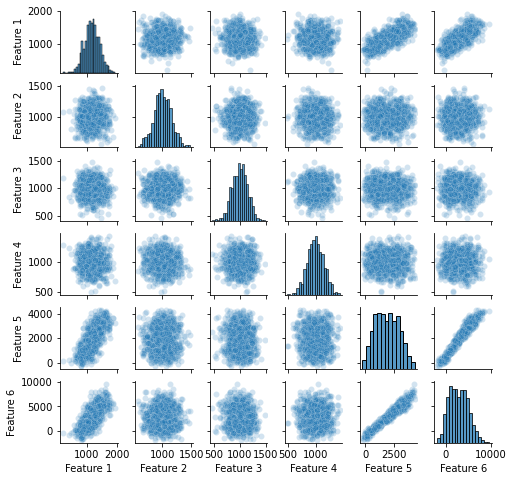

In [6]:
sns.pairplot(df,vars=['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6'],markers='o',plot_kws={'alpha': 0.2})
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.4, top=0.4, wspace=0.3, hspace=0.2)
plt.show()


We can see that some of the features are liearly correlated, and some are not correlated at all.

Let's compare projecting to 999 components to projecting to 10 components to check how random projection performs on our dataset.

The following block is from the Multidimensional Scaling workflow by Professor Michael Pyrcz, 
https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Multidimensional_Scaling.ipynb.

100 Components - Distance Ratio, mean: 1.01, standard deviation 0.01.
10 Components - Distance Ratio, mean: 0.70, standard deviation 0.15.


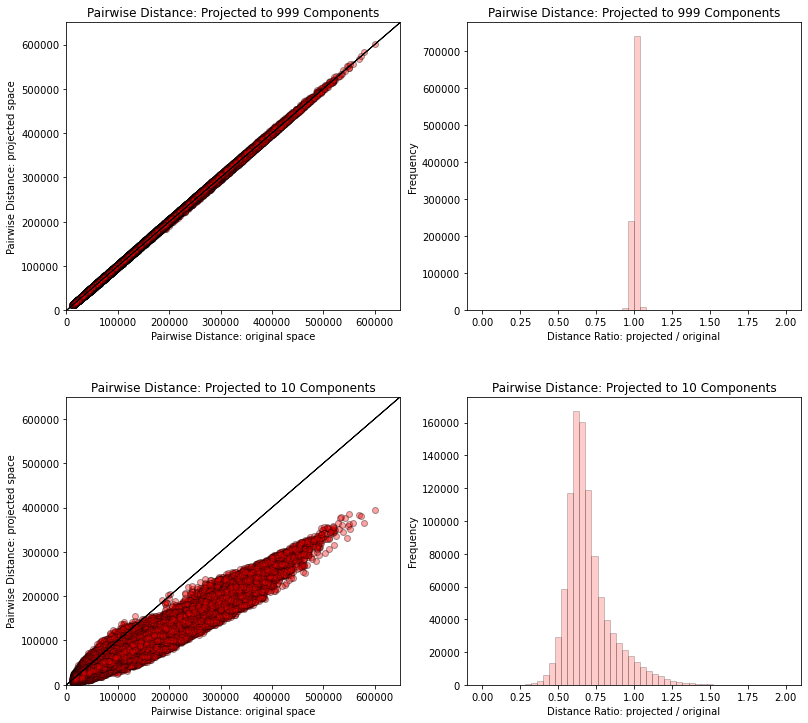

In [7]:
#from Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Multidimensional_Scaling.ipynb

n_components = 999
rp = GaussianRandomProjection(n_components=n_components,random_state = seed)

dists = euclidean_distances(df[list(df.columns.values)], squared=False).ravel()
nonzero = dists != 0   # select only non-identical samples pairs
dists = dists[nonzero]

projected_data = rp.fit_transform(df[list(df.columns.values)])
projected_dists = euclidean_distances(projected_data, squared=False).ravel()[nonzero]

plt.subplot(221)
plt.scatter(dists,projected_dists,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,6.5*10**5,6.5*10**5,width=0.02,color='black',head_length=0.0,head_width=0.0)
plt.xlim(0,6.5*10**5); plt.ylim(0,6.5*10**5)
plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

rates = projected_dists / dists
print("100 Components - Distance Ratio, mean: %0.2f, standard deviation %0.2f." % (np.mean(rates), np.std(rates)))

plt.subplot(222)
plt.hist(rates, bins=50, range=(0., 2.),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Distance Ratio: projected / original")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

n_components = 10
rp = GaussianRandomProjection(n_components=n_components,random_state = seed)

dists = euclidean_distances(df[list(df.columns.values)], squared=False).ravel()
nonzero = dists != 0   # select only non-identical samples pairs
dists = dists[nonzero]

projected_data = rp.fit_transform(df[list(df.columns.values)])
projected_dists = euclidean_distances(projected_data, squared=False).ravel()[nonzero]

plt.subplot(223)
plt.scatter(dists,projected_dists,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,7*10**5,7*10**5,width=0.02,color='black',head_length=0.0,head_width=0.0)
plt.xlim(0,6.5*10**5); plt.ylim(0,6.5*10**5)
plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

rates = projected_dists / dists
print("10 Components - Distance Ratio, mean: %0.2f, standard deviation %0.2f." % (np.mean(rates), np.std(rates)))

plt.subplot(224)
plt.hist(rates, bins=50, range=(0., 2.),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Distance Ratio: projected / original")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=2.3, wspace=0.2, hspace=0.3)
plt.show()

These results make sense. 

Projecting from 1000 to 999 components has almost no error.

Projecting from 1000 to 10 components has a lot of error. 

### Step 2: Comparing Pairwise Distance Ratio For Every Level of Projection

Let's project to every component less than the number of features (999, 998, 997, ...).

This may take some time because of the high dimensionality of the problem. 

In [8]:
rand_proj(df,1000,1000)   #random project for all (1000) features, all (1000) samples

100% |########################################################################|


Now we'll plot the mean distance ratio to compare how the level of accuracy declines with the number of components projected to. 

<function matplotlib.pyplot.show(close=None, block=None)>

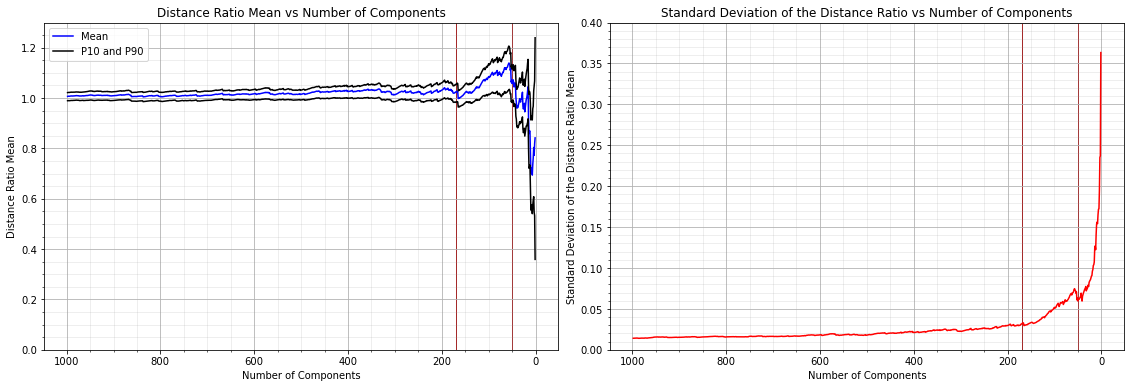

In [9]:
fig = plt.figure()

plt.subplot(221)
plt.plot(projected_to_list_1000_1000, meanlist_1000_1000, color='blue')
plt.plot(projected_to_list_1000_1000, P10_list_1000_1000, color='black')
plt.plot(projected_to_list_1000_1000, P90_list_1000_1000, color='black')
plt.arrow(50,0,0,1.3,width=0.001,color='brown',head_length=0.0,head_width=0.0)
plt.arrow(170,0,0,1.3,width=0.001,color='brown',head_length=0.0,head_width=0.0)
plt.xlabel('Number of Components')
plt.ylabel('Distance Ratio Mean')
plt.title('Distance Ratio Mean vs Number of Components')
plt.grid("true")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(['Mean','P10 and P90'])
plt.ylim(0,1.3)
plt.gca().invert_xaxis()

plt.subplot(222)
plt.plot(projected_to_list_1000_1000, stdevlist_1000_1000, color='red')
plt.arrow(50,0,0,0.4,width=0.001,color='brown',head_length=0.0,head_width=0.0)
plt.arrow(170,0,0,0.4,width=0.001,color='brown',head_length=0.0,head_width=0.0)
plt.xlabel('Number of Components')
plt.ylabel('Standard Deviation of the Distance Ratio Mean')
plt.title('Standard Deviation of the Distance Ratio vs Number of Components')
plt.grid("true")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.ylim(0,0.4)
plt.gca().invert_xaxis()

plt.subplots_adjust(left=0., bottom=0.0, right=2.5, top=2.5, wspace=0.1, hspace=0.2)
plt.show

Note that the number of components (x-axis) is inverted.

Random projection maintains accurate pairwise distances well until much lower dimensionality. 

Around p=170, the accuracy starts to decline more before becoming comletely unstable around p=50. This can aslo be seen where the standard deviation of the distance ratio mean starts to exponentially increase.

This suggests that for this dataset, we could project down to 170 components without a lot of error.

### Step 3: Comparing Different Amounts of Sample Data

Random projection is meant to be run on datasets without many samples.

Let's repeat Step 2 for the first 100 and first 10 samples of our dataset to see if using less samples changes the accuracy of our random projections.

First, let's create the reduced datasets by making new dataframes.

In [10]:
df_1000_100 = df.iloc[:100,:] 
df_1000_10 = df.iloc[:10,:] 

Now, let's visualize them to see how they keep their shapes.

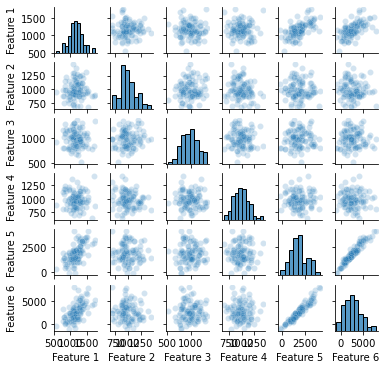

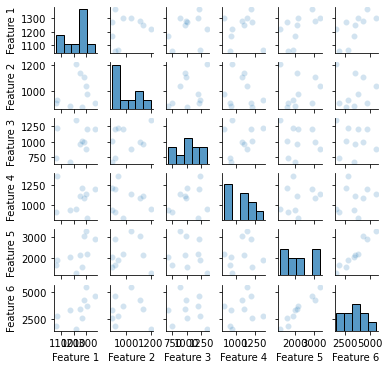

In [11]:
sns.pairplot(df_1000_100,vars=['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6'],markers='o',plot_kws={'alpha': 0.2})
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.3, top=0.3, wspace=0.3, hspace=0.2)
sns.pairplot(df_1000_10,vars=['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6'],markers='o',plot_kws={'alpha': 0.2})
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.3, top=0.3, wspace=0.3, hspace=0.2)
plt.show()

The features keep their correlation even at 10 samples.

Run the random projection vs number of components function.

In [12]:
rand_proj(df_1000_100,1000,100)
rand_proj(df_1000_10,1000,10)

100% |########################################################################|
100% |########################################################################|


Now we'll plot the mean distance ratio to compare the accuracy of using less samples to random project. 

<function matplotlib.pyplot.show(close=None, block=None)>

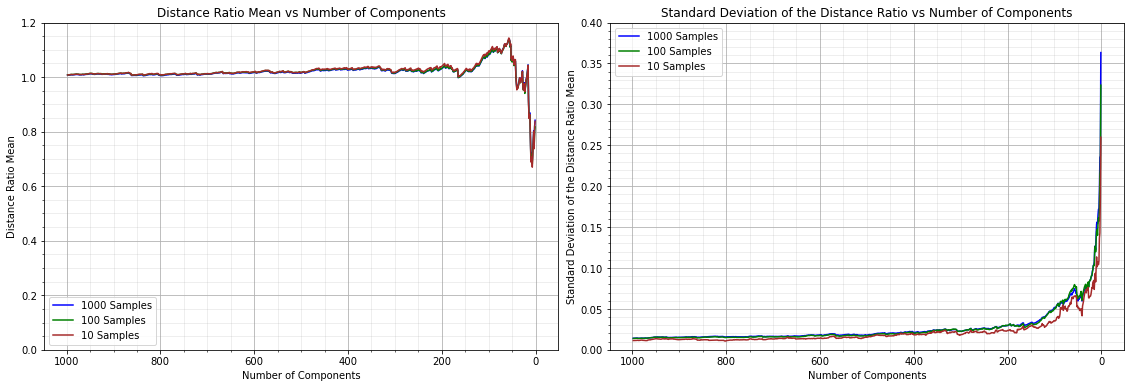

In [13]:
fig = plt.figure()

plt.subplot(221)
plt.plot(projected_to_list_1000_1000, meanlist_1000_1000, color='blue')
plt.plot(projected_to_list_1000_100, meanlist_1000_100, color='green')
plt.plot(projected_to_list_1000_10, meanlist_1000_10, color='brown')
plt.xlabel('Number of Components')
plt.ylabel('Distance Ratio Mean')
plt.title('Distance Ratio Mean vs Number of Components')
plt.grid("true")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(['1000 Samples','100 Samples','10 Samples'])
plt.ylim(0,1.2)
#plt.xlim(5.0,25.0)
plt.gca().invert_xaxis()

plt.subplot(222)
plt.plot(projected_to_list_1000_1000, stdevlist_1000_1000, color='blue')
plt.plot(projected_to_list_1000_100, stdevlist_1000_100, color='green')
plt.plot(projected_to_list_1000_10, stdevlist_1000_10, color='brown')
plt.xlabel('Number of Components')
plt.ylabel('Standard Deviation of the Distance Ratio Mean')
plt.title('Standard Deviation of the Distance Ratio vs Number of Components')
plt.grid("true")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.ylim(0,0.4)
plt.legend(['1000 Samples','100 Samples','10 Samples'])
plt.gca().invert_xaxis()

plt.subplots_adjust(left=0., bottom=0.0, right=2.5, top=2.5, wspace=0.1, hspace=0.2)
plt.show

As expected, using less samples doesn't change the accuracy of the distance ratio mean.

### Step 4: Comparing Different Numbers of Features

Random projection is meant for high dimensional, low sample datasets. 

Let's see how random projection performs when we only use the first 100 and first 10 features in our dataset.

Our low sample dataset (df_1000_10) works similarly to our original high sample dataset (df), so we'll use that in future calculations.

In [14]:
df_100_10 = df_1000_10.iloc[:,:100]
df_10_10 = df_1000_10.iloc[:,:10]

Now we'll run our random projection vs number of components function for both. 

In [15]:
rand_proj(df_100_10,100,10)
rand_proj(df_10_10,10,10)

100% |########################################################################|
100% |########################################################################|


Plot the mean distance ratio to see what will happen if we start with fewer features during our projections. 

<function matplotlib.pyplot.show(close=None, block=None)>

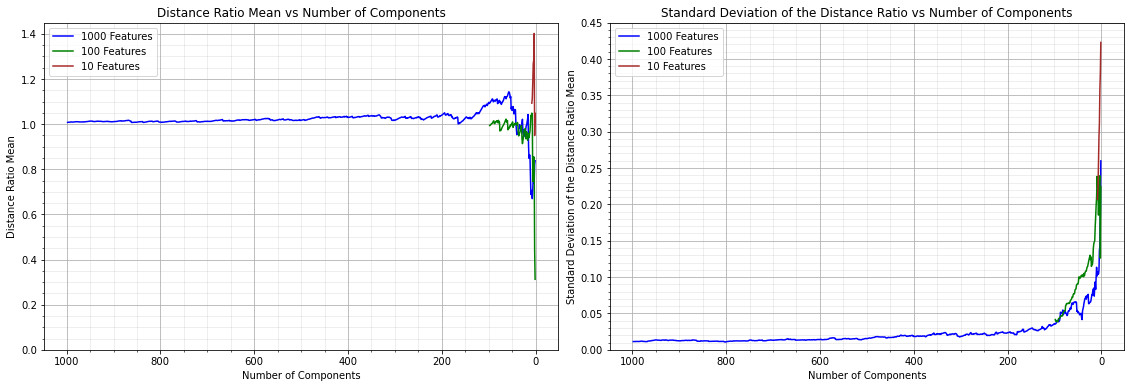

In [16]:
fig = plt.figure()

plt.subplot(221)
plt.plot(projected_to_list_1000_10, meanlist_1000_10, color='blue')
plt.plot(projected_to_list_100_10, meanlist_100_10, color='green')
plt.plot(projected_to_list_10_10, meanlist_10_10, color='brown')
plt.xlabel('Number of Components')
plt.ylabel('Distance Ratio Mean')
plt.title('Distance Ratio Mean vs Number of Components')
plt.grid("true")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(['1000 Features','100 Features','10 Features'])
plt.ylim(0,1.45)
#plt.xlim(5.0,25.0)
plt.gca().invert_xaxis()

plt.subplot(222)
plt.plot(projected_to_list_1000_10, stdevlist_1000_10, color='blue')
plt.plot(projected_to_list_100_10, stdevlist_100_10, color='green')
plt.plot(projected_to_list_10_10, stdevlist_10_10, color='brown')
plt.xlabel('Number of Components')
plt.ylabel('Standard Deviation of the Distance Ratio Mean')
plt.title('Standard Deviation of the Distance Ratio vs Number of Components')
plt.grid("true")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.ylim(0,0.45)
plt.legend(['1000 Features','100 Features','10 Features'])
plt.gca().invert_xaxis()

plt.subplots_adjust(left=0., bottom=0.0, right=2.5, top=2.5, wspace=0.1, hspace=0.2)
plt.show

This is hard to visualize with the full data. 

Let's zoom in and look at 0 to 100 components only. 

<function matplotlib.pyplot.show(close=None, block=None)>

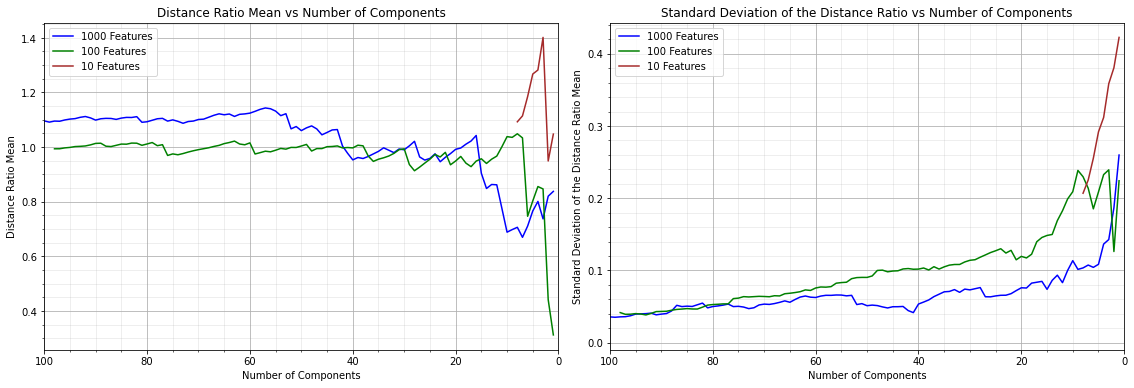

In [17]:
fig = plt.figure()

plt.subplot(221)
plt.plot(projected_to_list_1000_10, meanlist_1000_10, color='blue')
plt.plot(projected_to_list_100_10, meanlist_100_10, color='green')
plt.plot(projected_to_list_10_10, meanlist_10_10, color='brown')
plt.xlabel('Number of Components')
plt.ylabel('Distance Ratio Mean')
plt.title('Distance Ratio Mean vs Number of Components')
plt.grid("true")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(['1000 Features','100 Features','10 Features'])
#plt.ylim(0,1.2)
plt.xlim(0,100)
plt.gca().invert_xaxis()

plt.subplot(222)
plt.plot(projected_to_list_1000_10, stdevlist_1000_10, color='blue')
plt.plot(projected_to_list_100_10, stdevlist_100_10, color='green')
plt.plot(projected_to_list_10_10, stdevlist_10_10, color='brown')
plt.xlabel('Number of Components')
plt.ylabel('Standard Deviation of the Distance Ratio Mean')
plt.title('Standard Deviation of the Distance Ratio vs Number of Components')
plt.grid("true")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlim(0,100)
plt.legend(['1000 Features','100 Features','10 Features'])
plt.gca().invert_xaxis()

plt.subplots_adjust(left=0., bottom=0.0, right=2.5, top=2.5, wspace=0.1, hspace=0.2)
plt.show

There isn't much difference between using 1000 or 100 features.

However, when we only use 10 features, the distance ratio mean moves away from 1 almost immediately and the standard deviation skyrockets instead of developing a slow buildup. This suggests that random projection can be used for high dimensional datasets, but will not preserve pairwise distances for lower dimensionality sets.

### Results

As shown in Step 3 (and below), random projection accuracy does not change with sample size. 

However, as shown in Step 4 (and below), random projection only works well with high dimensional datasets. If a dataset has too few features, the pairwise distances are not maintained well.

<function matplotlib.pyplot.show(close=None, block=None)>

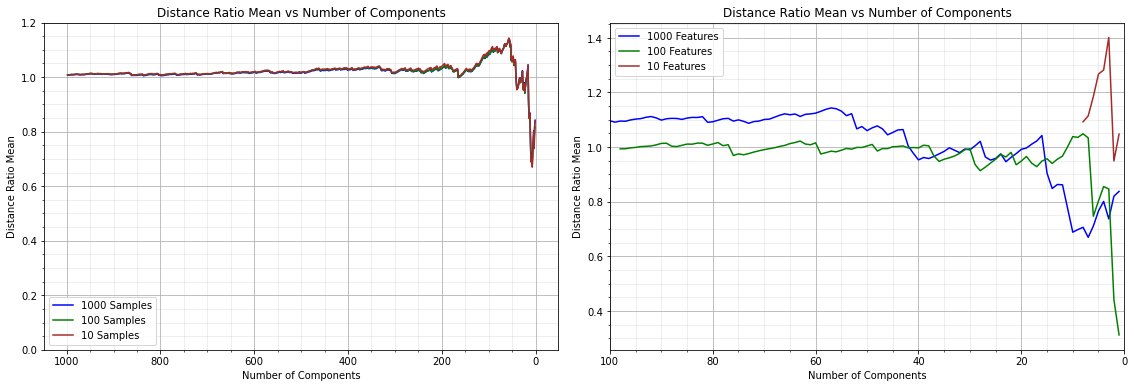

In [18]:
plt.subplot(221)
plt.plot(projected_to_list_1000_1000, meanlist_1000_1000, color='blue')
plt.plot(projected_to_list_1000_100, meanlist_1000_100, color='green')
plt.plot(projected_to_list_1000_10, meanlist_1000_10, color='brown')
plt.xlabel('Number of Components')
plt.ylabel('Distance Ratio Mean')
plt.title('Distance Ratio Mean vs Number of Components')
plt.grid("true")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(['1000 Samples','100 Samples','10 Samples'])
plt.ylim(0,1.2)
#plt.xlim(5.0,25.0)
plt.gca().invert_xaxis()

plt.subplot(222)
plt.plot(projected_to_list_1000_10, meanlist_1000_10, color='blue')
plt.plot(projected_to_list_100_10, meanlist_100_10, color='green')
plt.plot(projected_to_list_10_10, meanlist_10_10, color='brown')
plt.xlabel('Number of Components')
plt.ylabel('Distance Ratio Mean')
plt.title('Distance Ratio Mean vs Number of Components')
plt.grid("true")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(['1000 Features','100 Features','10 Features'])
#plt.ylim(0,1.2)
plt.xlim(0,100)
plt.gca().invert_xaxis()

plt.subplots_adjust(left=0., bottom=0.0, right=2.5, top=2.5, wspace=0.1, hspace=0.2)
plt.show

### Christian Willoughby, Ph.D Aspirant, University of Texas at Austin 
*Reservoir Simulation, CO2 EOR and Storage*

Christian graduated *summa cum laude* from Missouri University of Science and Technology (University of Missouri at Rolla)  with a Bachelor's in petroleum engineering in 2019. With experience in both reservoir and drilling engineering, Christian has returned to school to realize his goals of becoming a reservoir simulation engineer specializing in CO2 EOR and storage. He has an upcoming internship with Occidental Petroleum in which he will simulate CO2 EOR in hydraulically fractured unconventional formations.

I hope this was helpful,

*Christian*

Christian Willoughby, Ph.D. Aspirant at The Hildebrand Department of Petroleum and Geosystems Engineering, The University of Texas at Austin

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
